# Lok Sabha election 2024

## Kalvium Data Analyst

In [29]:
# import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import matplotlib.style
%matplotlib inline 
import geopandas as gpd
from scipy.stats import describe
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings('ignore')


### Data loading

In [11]:
# load phase data

phases_load=['Phase1','Phase2','Phase3','Phase4','Phase5','Phase6','Phase7']
phases=pd.concat(pd.read_excel('DataSet\phase_data.xlsx',sheet_name=phases_load), ignore_index=True)

# load General Election data

data=pd.read_excel('DataSet\GE India 2024.xlsx',sheet_name='Final Result')
sheet_load=['Final Result','Counted vs polled','Victory Margins']
data=pd.concat(pd.read_excel('DataSet\GE India 2024.xlsx',sheet_name=sheet_load),ignore_index=True)

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.N                   8902 non-null   float64
 1   Candidate             8902 non-null   object 
 2   Party                 8902 non-null   object 
 3   EVM Votes             8902 non-null   object 
 4   Postal Votes          8902 non-null   object 
 5   Total Votes           8902 non-null   object 
 6   % of Votes            8902 non-null   object 
 7   State                 9445 non-null   object 
 8   Constituency          9445 non-null   object 
 9   Victory Margin        1084 non-null   float64
 10  PC Name               544 non-null    object 
 11  EVM Votes Counted     544 non-null    float64
 12  Postal Votes Counted  544 non-null    float64
 13  EVM Votes Polled      544 non-null    float64
 14  Difference            544 non-null    float64
 15  Margin               

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency,Victory Margin,PC Name,EVM Votes Counted,Postal Votes Counted,EVM Votes Polled,Difference,Margin,Difference > Margin,Postalvotes > Margin
0,1.0,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,24396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Preprocessing

In [12]:
data['EVM Votes'] = pd.to_numeric(data['EVM Votes'],errors='coerce')
data['Postal Votes'] = pd.to_numeric(data['Postal Votes'],errors='coerce')
data['Total Votes'] = pd.to_numeric(data['Total Votes'],errors='coerce')
data['% of Votes'] = pd.to_numeric(data['% of Votes'].str.replace('%',''),errors='coerce')

In [17]:
data['EVM Votes'].fillna(data['EVM Votes'].median(),inplace=True)
data['Postal Votes'].fillna(0,inplace=True)
data['Total Votes'].fillna(data['Total Votes'].median(),inplace=True)

In [18]:
data.head(10)

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency,Victory Margin,PC Name,EVM Votes Counted,Postal Votes Counted,EVM Votes Polled,Difference,Margin,Difference > Margin,Postalvotes > Margin
0,1.0,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,24396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911.0,3.0,914.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714.0,5.0,719.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,RINKU MALA MONDAL,Independent,539.0,3.0,542.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,K VENKAT RAM BABU,Independent,506.0,1.0,507.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,USHA KUMARI,Independent,378.0,2.0,380.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
v_margin=data['Victory Margin']
per_of_votes=data['% of Votes']

data.drop(columns=['Victory Margin','% of Votes'], inplace=True)

In [20]:
data.isnull().sum()

S.N                     1087
Candidate               1087
Party                   1087
EVM Votes                  0
Postal Votes               0
Total Votes                0
State                    544
Constituency             544
PC Name                 9445
EVM Votes Counted       9445
Postal Votes Counted    9445
EVM Votes Polled        9445
Difference              9445
Margin                  9447
Difference > Margin     9446
Postalvotes > Margin    9447
dtype: int64

### Exploratory Data Analysis

In [21]:
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['S.N', 'EVM Votes', 'Postal Votes', 'Total Votes', 'EVM Votes Counted', 'Postal Votes Counted', 'EVM Votes Polled', 'Difference', 'Margin', 'Difference > Margin', 'Postalvotes > Margin']
Categorical variables: ['Candidate', 'Party', 'State', 'Constituency', 'PC Name']


In [22]:
# Count the number of categorical and numerical variables
categorical_count = data.select_dtypes(include='object').shape[1]
numerical_count = data.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 5
Number of numerical variables: 11


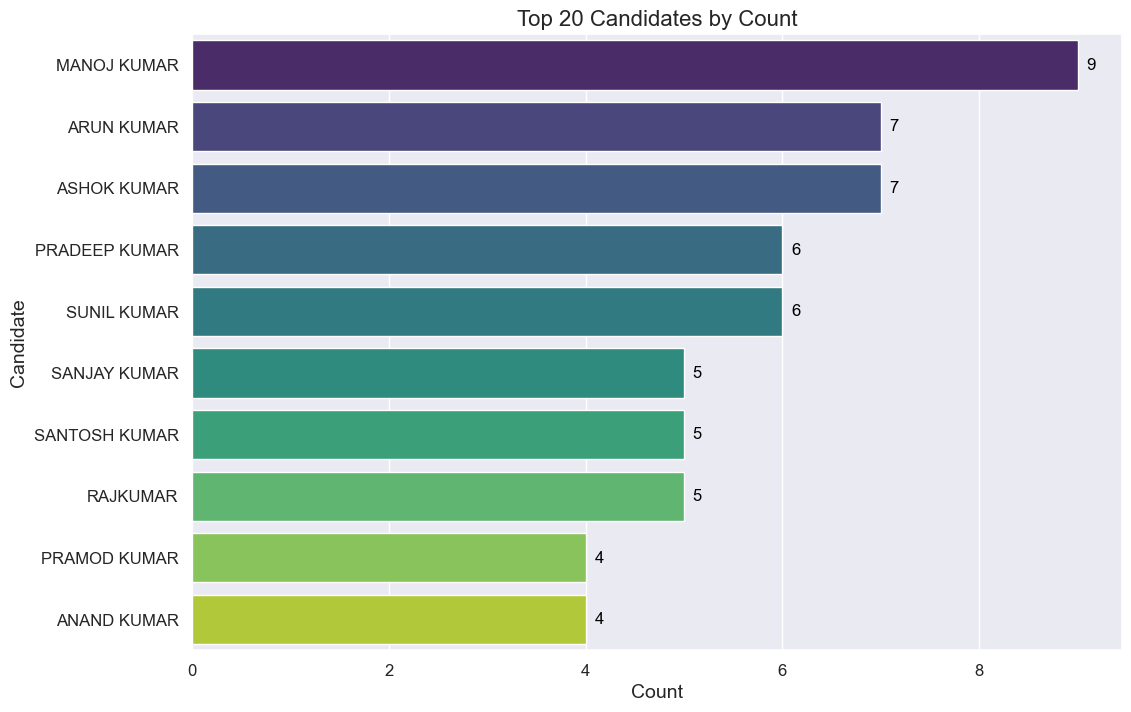

In [26]:
candidate_counts = data[data['Candidate'] != 'NOTA']['Candidate'].value_counts()


plt.figure(figsize=(12, 8))
sns.barplot(x=candidate_counts[:10], y=candidate_counts[:10].index, palette='viridis')
plt.title('Top 10 Candidates by Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Candidate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate bar scores
max_count = candidate_counts[:10].max()
for i, count in enumerate(candidate_counts[:10]):
    plt.text(count + max_count * 0.01, i, str(count), va='center', fontsize=12, color='black')

plt.show()

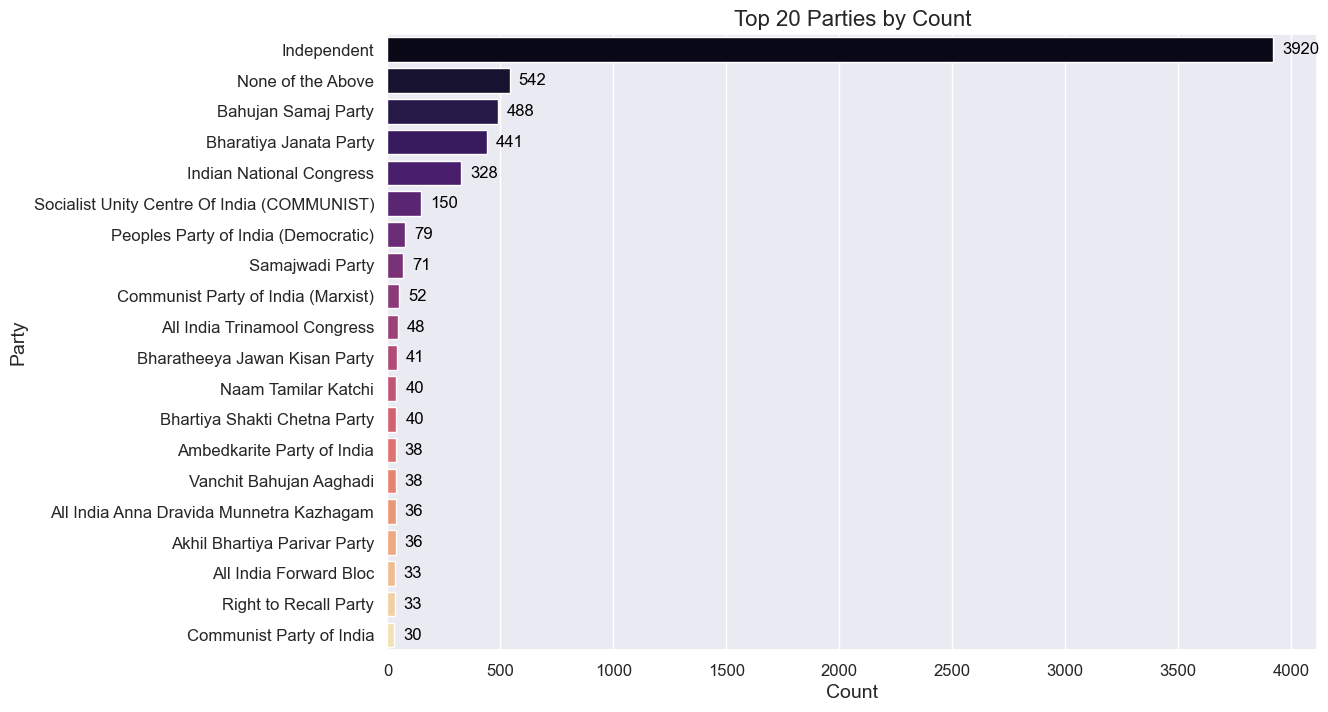

In [27]:
party_counts = data['Party'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=party_counts[:20], y=party_counts[:20].index, palette='magma')
plt.title('Top 20 Parties by Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Party', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate bar scores
max_count = party_counts[:20].max()
for i, count in enumerate(party_counts[:20]):
    plt.text(count + max_count * 0.01, i, str(count), va='center', fontsize=12, color='black')

plt.show()

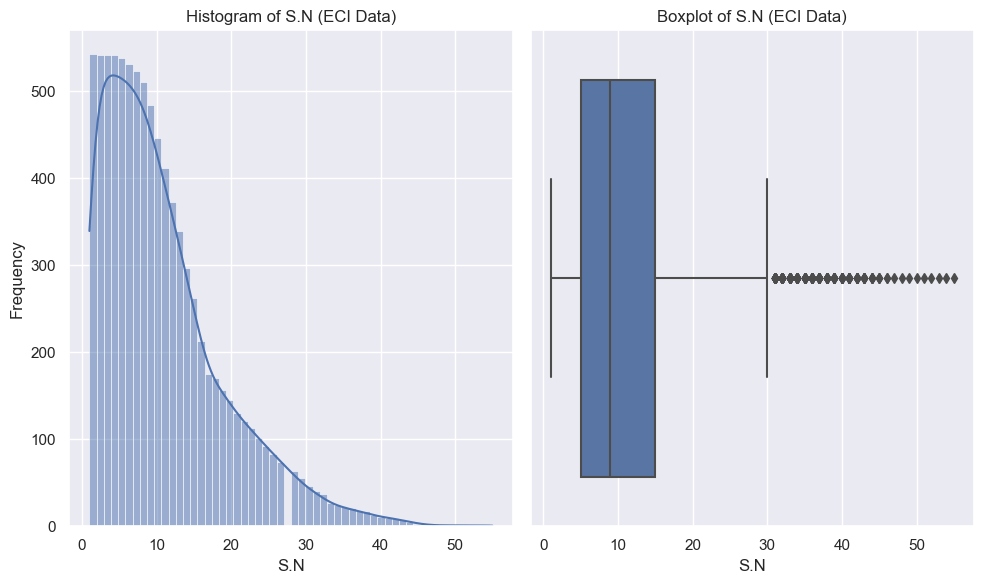

ECI Data - S.N: Skewness = 1.2690412586835371, Kurtosis = 1.7060143805667778


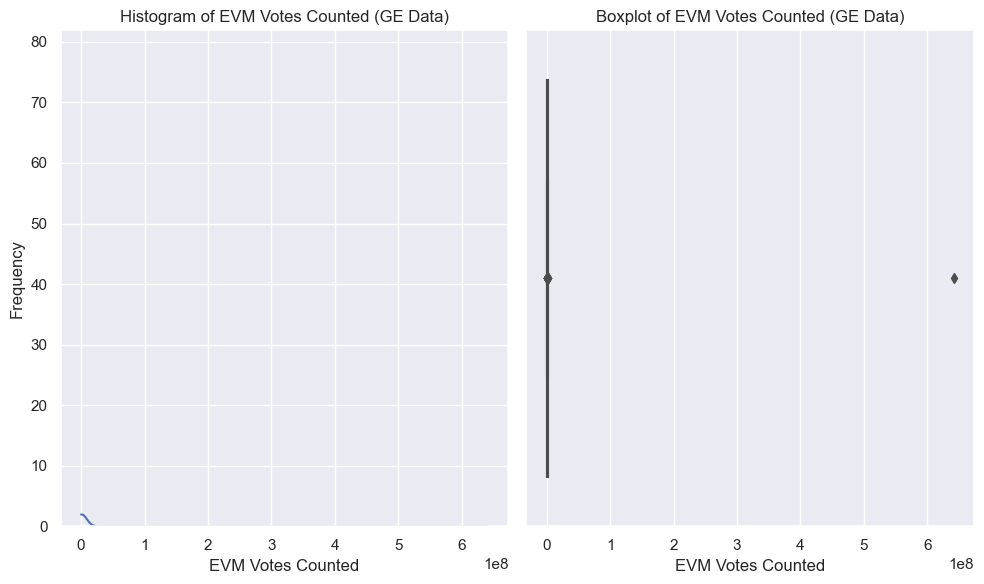

GE Data - EVM Votes Counted: Skewness = 23.2565726648374, Kurtosis = 538.9129070353644


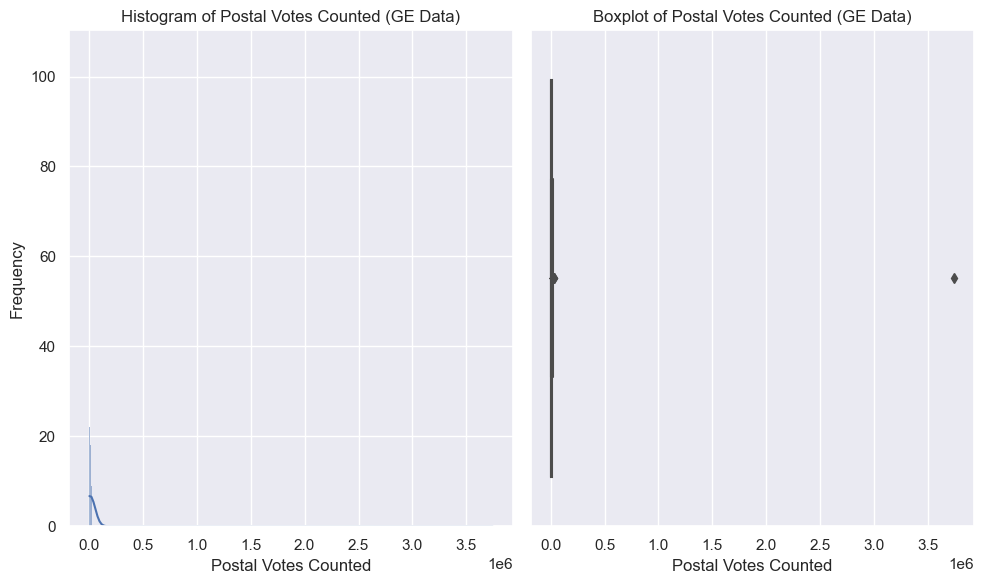

GE Data - Postal Votes Counted: Skewness = 23.22465193938857, Kurtosis = 537.9237158859311


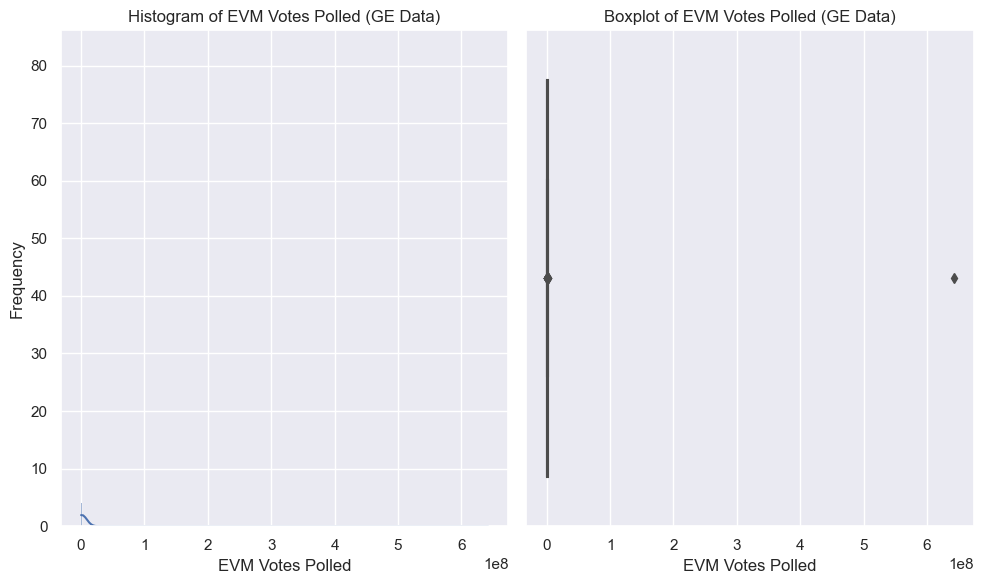

GE Data - EVM Votes Polled: Skewness = 23.256571289676096, Kurtosis = 538.912864384417


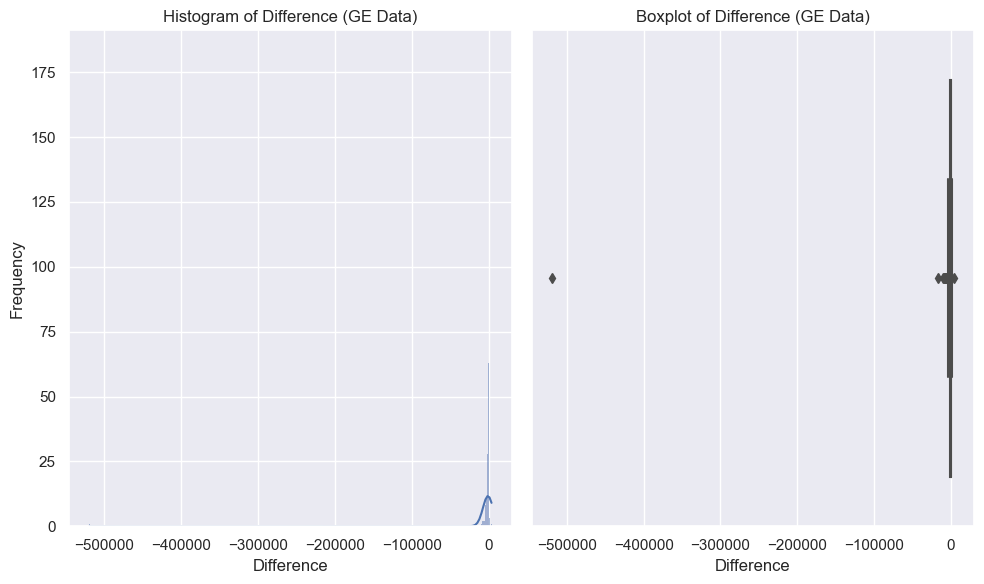

GE Data - Difference: Skewness = -23.051498054157605, Kurtosis = 532.5301663804062


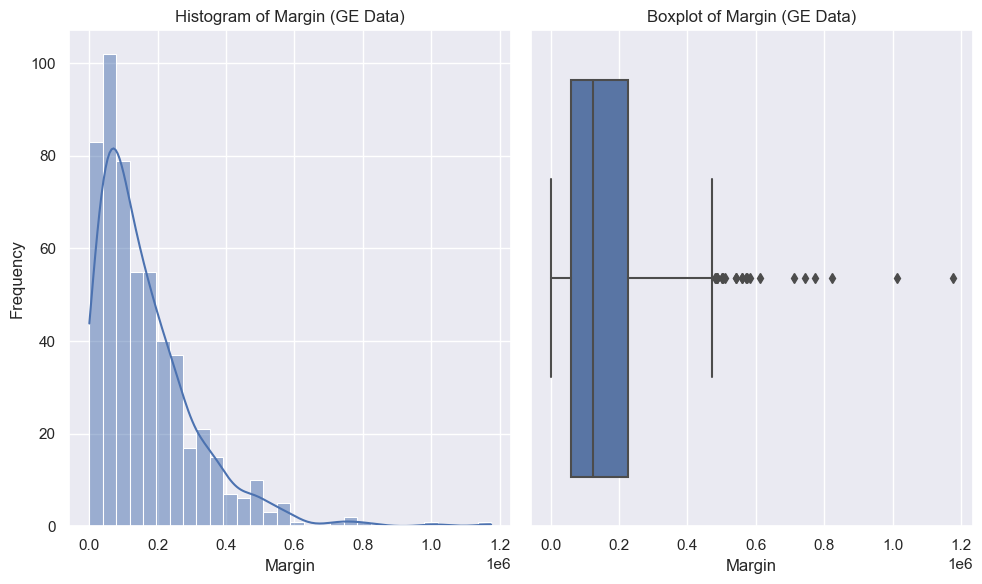

GE Data - Margin: Skewness = 2.067650216854479, Kurtosis = 7.1950657066221595


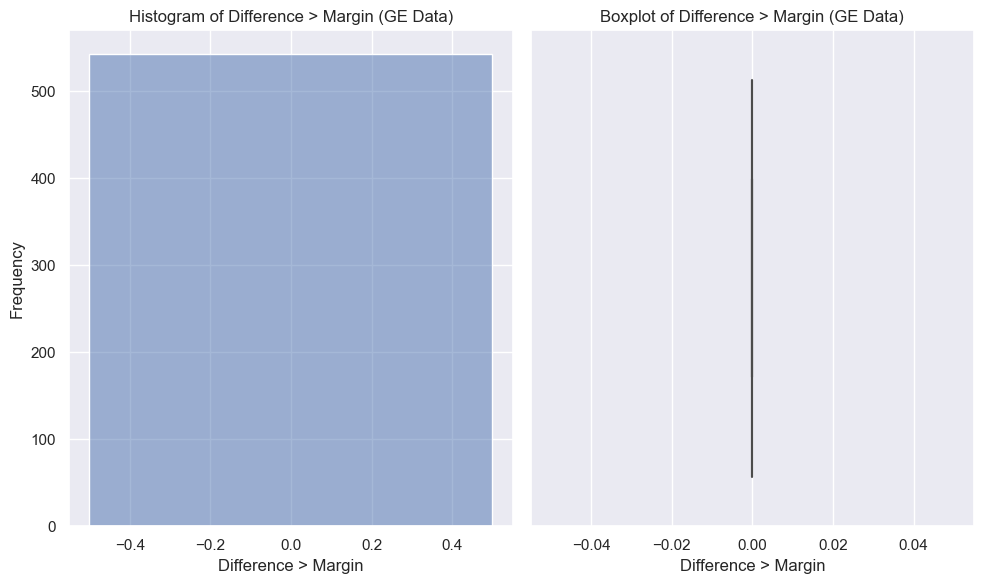

GE Data - Difference > Margin: Skewness = nan, Kurtosis = nan


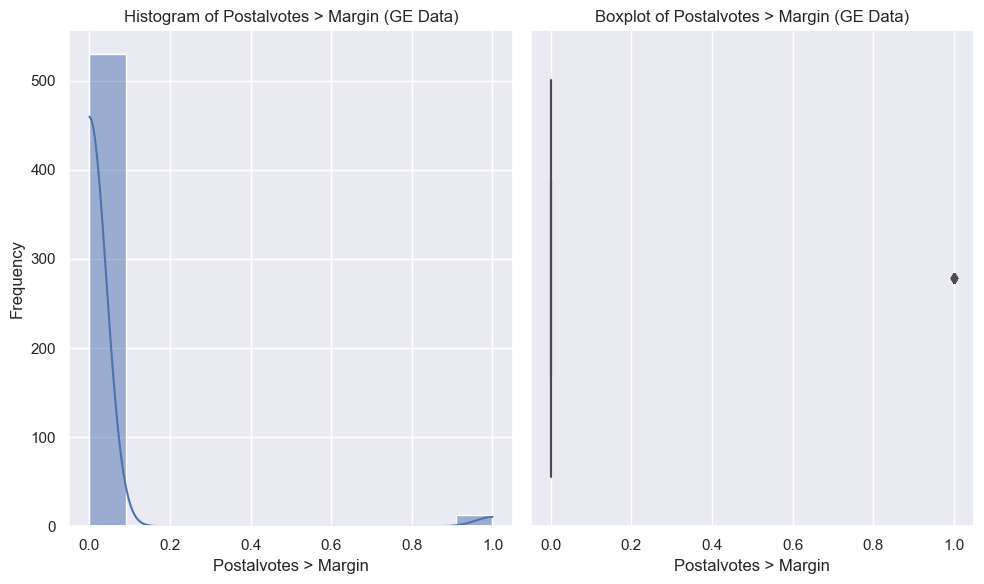

GE Data - Postalvotes > Margin: Skewness = 6.4953297203529745, Kurtosis = 40.18930817610064


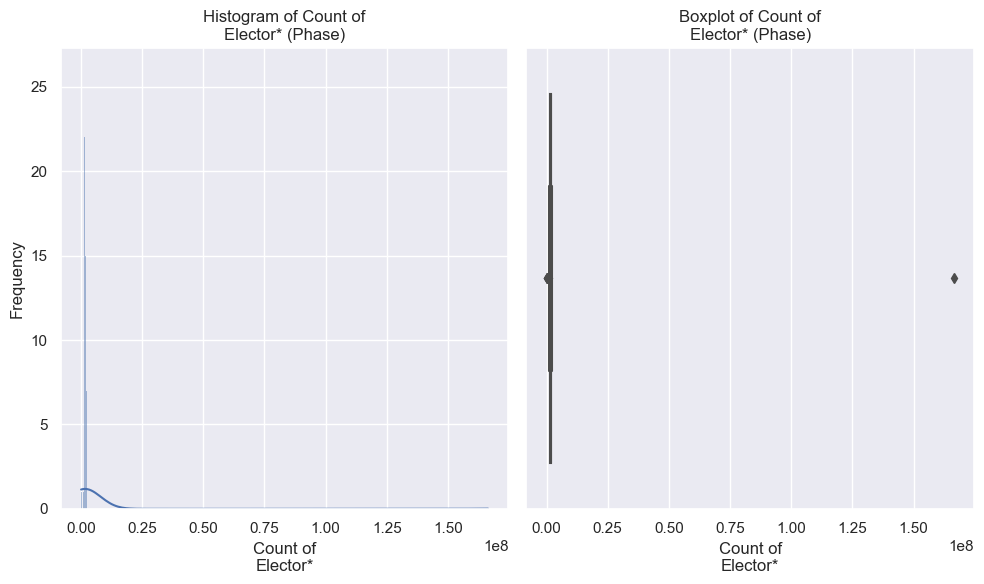

Phase - Count of
Elector*: Skewness = 9.98964427979966, Kurtosis = 97.86698570093387


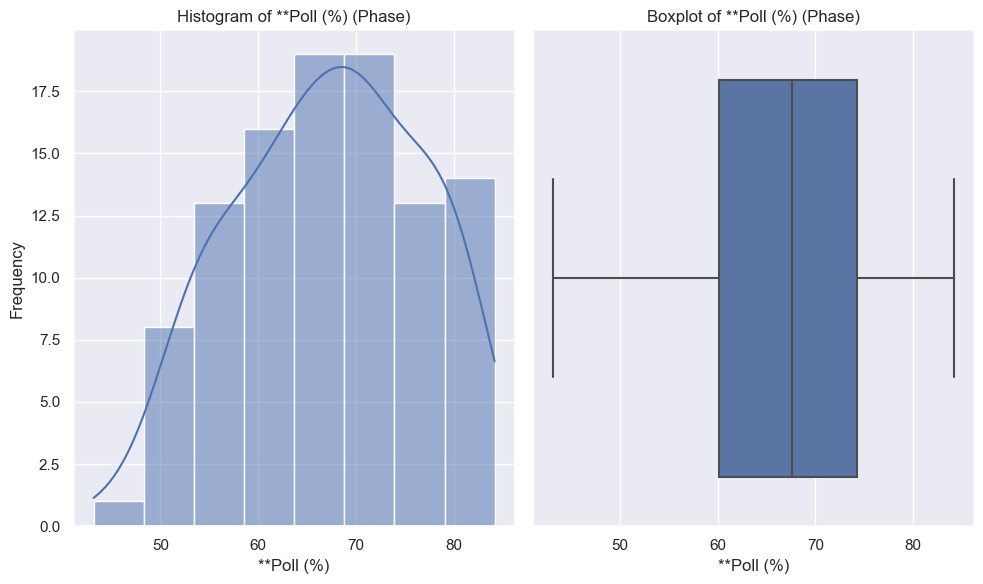

Phase - **Poll (%): Skewness = -0.1899984219387674, Kurtosis = -0.8226869740106468


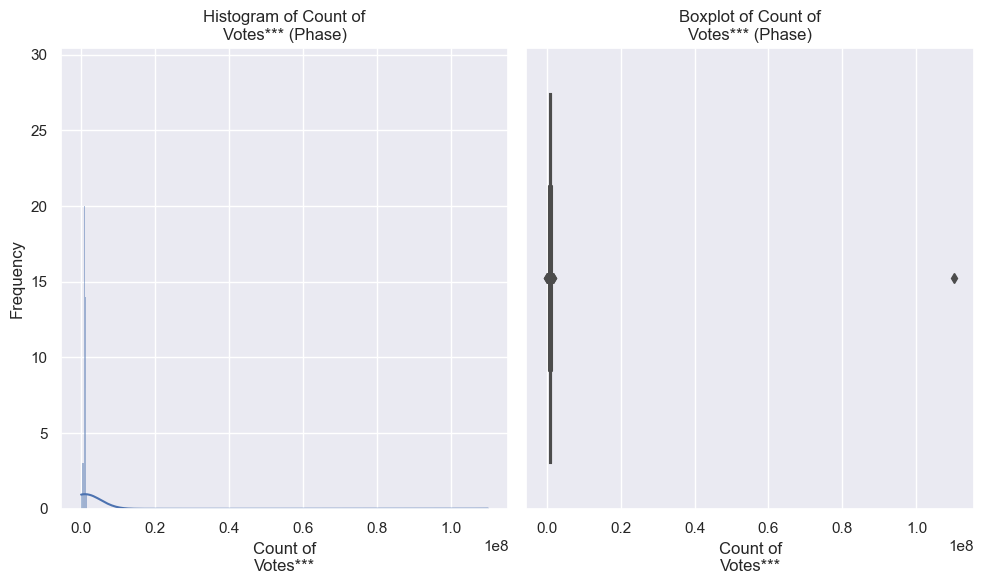

Phase - Count of
Votes***: Skewness = 9.98993971718611, Kurtosis = 97.870849217738


In [38]:
# distribution shape
def distribution_shape(df, title):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col} ({title})')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col} ({title})')
        plt.xlabel(col)
        
        plt.tight_layout()
        plt.show()
        
        # Skewness and Kurtosis
        col_skewness = skew(df[col].dropna())
        col_kurtosis = kurtosis(df[col].dropna())
        print(f'{title} - {col}: Skewness = {col_skewness}, Kurtosis = {col_kurtosis}')

# Call the function with the DataFrames
distribution_shape(pd.read_csv('DataSet\eci_data_2024.csv', encoding='latin-1'), 'ECI Data')
distribution_shape(pd.read_excel('DataSet\GE India 2024.xlsx'), 'GE Data')
distribution_shape(pd.read_excel('DataSet\phase_data.xlsx'), 'Phase')
